In [220]:
import numpy as np
import pandas as pd

In [255]:
def mse(y, y1):
    error = y - y1
    return np.mean(error ** 2)

In [222]:
class ScratchLinearRegression():
    """
    Scratch implementation of linear regression
    
    Parameters
    ----------
    num_iter : int
      Number of iterations
    lr : float
      Learning rate
    no_bias : bool
      True if no bias term is included
    verbose : bool
      True to output the learning process
    
    Attributes
    ----------
    self.coef_ : of the following form. ndarray, shape (n_features,)
      Parameters
    self.loss : of the following form. ndarray, shape (self.iter,)
      Record losses on training data
    self.val_loss : of the following form. ndarray, shape (self.iter,)
      Record loss on validation data
    """
    
    def __init__(self, num_iter, lr, no_bias, verbose):
        # Record hyperparameters as attributes
        self.iter = num_iter
        self.lr = lr
        self.no_bias = no_bias
        self.verbose = verbose
        # Prepare an array to record the loss
        self.loss = np.zeros(self.iter)
        self.val_loss = np.zeros(self.iter)
        
    def _linear_hypothesis(self, X):
        """
        Compute a linear hypothetical function

        Parameters
        ----------
        X : of the following form. ndarray, shape (n_samples, n_features)
          Training data

        Returns
        -------
          of the following form. ndarray, shape (n_samples, 1)
          Estimated result by linear hypothetical function

        """
        x1 = X

        if self.no_bias:
            x0 = np.zeros(x1.shape[0])
        else:
            x0 = np.ones(x1.shape[0])
            
        return np.concatenate([x0.reshape(-1,1), x1], axis=1)
    
    
    def _gradient_descent(self, X, error):
        """
        Optimize the error using the gradient decent and update the theta values(weights)
        
        Parameters
        ----------
        X : of the following form. ndarray, shape (n_samples, n_features)
          Training data
          
        error: of the following form. ndarray, shape (n_samples, 1)

        """
        

        self.theta = self.theta - self.lr * np.dot(error, X)/len(X)
        

    def fit(self, X, y, X_val=None, y_val=None):
        """
        Learn linear regression. If validation data is entered, the loss and accuracy for it are also calculated for each iteration.
        Parameters
        ----------
        X : of the following form. ndarray, shape (n_samples, n_features)
            Features of training data
        y : of the following form. ndarray, shape (n_samples, )
            Correct answer value of training data
        X_val : of the following form. ndarray, shape (n_samples, n_features)
            Features of verification data
        y_val : of the following form. ndarray, shape (n_samples, )
            Correct value of verification data
        """

        x1 = self._linear_hypothesis(X)
        
        self.theta = np.random.random(x1.shape[1])
        
        for i in range(self.iter):
            y1 = np.dot(x1, self.theta)

            #compute the loss function
            error = y1 - y
            self.loss[i] += mse(y, y1)/2

            # if x_val is entered, fit to it
            if isinstance(X_val, np.ndarray):
                x2 = self._linear_hypothesis(X_val)
                y2 = np.dot(x2, self.theta)
                error_val = y2 - y_val
                self.val_loss[i] += mse(y2, y_val)/2


            # optimize the objective function using gradient descent
            self._gradient_descent(x1, error)

            if self.verbose:
                #Output learning process when verbose is set to True
                print("n_iter: ", i,
                    "loss: ", self.loss[i],
                    "theta: ", self.theta)

        
    def predict(self, X):
        """
        Estimate using linear regression.
        Parameters
        ----------
        X : of the following form. ndarray, shape (n_samples, n_features)
            sample
        Returns
        -------
            of the following form. ndarray, shape (n_samples, 1)
            Estimated result by linear regression
        """
        return np.dot(self._linear_hypothesis(X), self.theta)

## Problem Six: Learning and Estimation

In [224]:
import pandas as pd

df = pd.read_csv("train.csv")
X = df[["YearBuilt"]].values
y = df[["SalePrice"]].values.reshape(-1)
print(X.shape)
print(y.shape)

(1460, 1)
(1460,)


In [225]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.8, random_state=0)

print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(1168, 1)
(1168,)
(292, 1)
(292,)


In [226]:
# Standardization
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaler.fit(X_train)

X_train_std = scaler.transform(X_train)
X_test_std = scaler.transform(X_test)

In [229]:
reg1 = ScratchLinearRegression(10000, 0.0001, False, True)
reg1.fit(X_train_std, y_train, X_test_std, y_test)
y_pred1 = reg1.predict(X_test_std)
y_pred1

n_iter:  0 loss:  19424272551.724762 theta:  [18.78051193  4.33460695]
n_iter:  1 loss:  19420836284.641342 theta:  [36.85952378  8.42416633]
n_iter:  2 loss:  19417400704.77697 theta:  [54.93672772 12.51331674]
n_iter:  3 loss:  19413965811.994217 theta:  [73.01212394 16.60205824]
n_iter:  4 loss:  19410531606.155674 theta:  [91.08571263 20.69039087]
n_iter:  5 loss:  19407098087.123955 theta:  [109.15749396  24.77831467]
n_iter:  6 loss:  19403665254.761703 theta:  [127.2274681   28.86582967]
n_iter:  7 loss:  19400233108.9316 theta:  [145.29563525  32.95293592]
n_iter:  8 loss:  19396801649.49634 theta:  [163.36199559  37.03963346]
n_iter:  9 loss:  19393370876.318653 theta:  [181.42654929  41.12592233]
n_iter:  10 loss:  19389940789.261295 theta:  [199.48929653  45.21180257]
n_iter:  11 loss:  19386511388.187046 theta:  [217.5502375   49.29727422]
n_iter:  12 loss:  19383082672.958717 theta:  [235.60937237  53.38233733]
n_iter:  13 loss:  19379654643.439144 theta:  [253.66670133  5

array([102480.9675253 ,  88870.84400484,  96526.5384851 , 119493.62192587,
       114389.8256057 ,  62501.22968395, 145012.60352673,  85468.31312472,
       135655.64360642, 142460.70536665, 144161.9708067 , 118642.98920584,
       138207.5417665 , 110987.29472559,  94825.27304504, 102480.9675253 ,
       132253.1127263 , 133954.37816636, 110136.66200556,  66754.39328409,
        98227.80392515, 142460.70536665, 107584.76384547, 133954.37816636,
       116941.72376579,  38683.51352314, 139058.17448653, 113539.19288567,
       145012.60352673,  93974.64032501, 103331.60024533, 133103.74544633,
       120344.2546459 , 139058.17448653, 145863.23624676, 135655.64360642,
       143311.33808668, 115240.45832573, 141610.07264662, 133954.37816636,
        96526.5384851 , 100779.70208524, 143311.33808668, 142460.70536665,
       134805.01088639, 108435.3965655 , 100779.70208524, 118642.98920584,
       120344.2546459 ,  93124.00760498, 141610.07264662, 109286.02928553,
       119493.62192587,  

[]

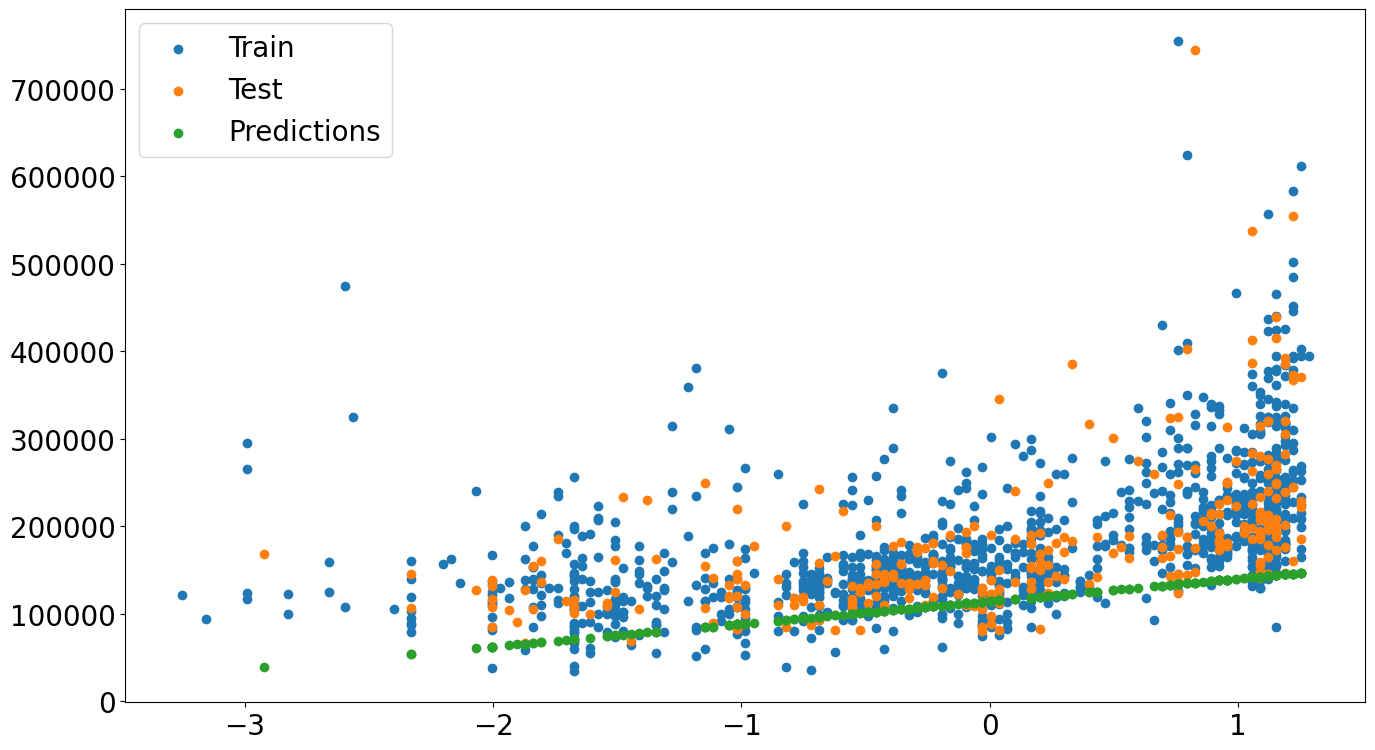

In [237]:
import matplotlib.pyplot as plt

fig = plt.subplots(figsize=(16, 9))
plt.rcParams["font.size"] = 20

plt.scatter(X_train_std, y_train, label="Train")
plt.scatter(X_test_std, y_test, label="Test")
plt.scatter(X_test_std, y_pred1, label="Predictions")
plt.legend()
plt.plot()

In [256]:
# Checking our model's performance using the MSE and RMSE metrics
mse_val = mse(y_test, y_pred1)
print(f"MSE: {mse_val}")
print(f"RMSE: {np.sqrt(mse_val):.1f}")

MSE: 9610118225.115301
RMSE: 98031.2


In [235]:
# Comparing with sklearn
from sklearn.linear_model import LinearRegression

reg2 = LinearRegression(lr)
reg2.fit(X_train_std, y_train)
y_pred_sk = reg2.predict(X_test_std)

[]

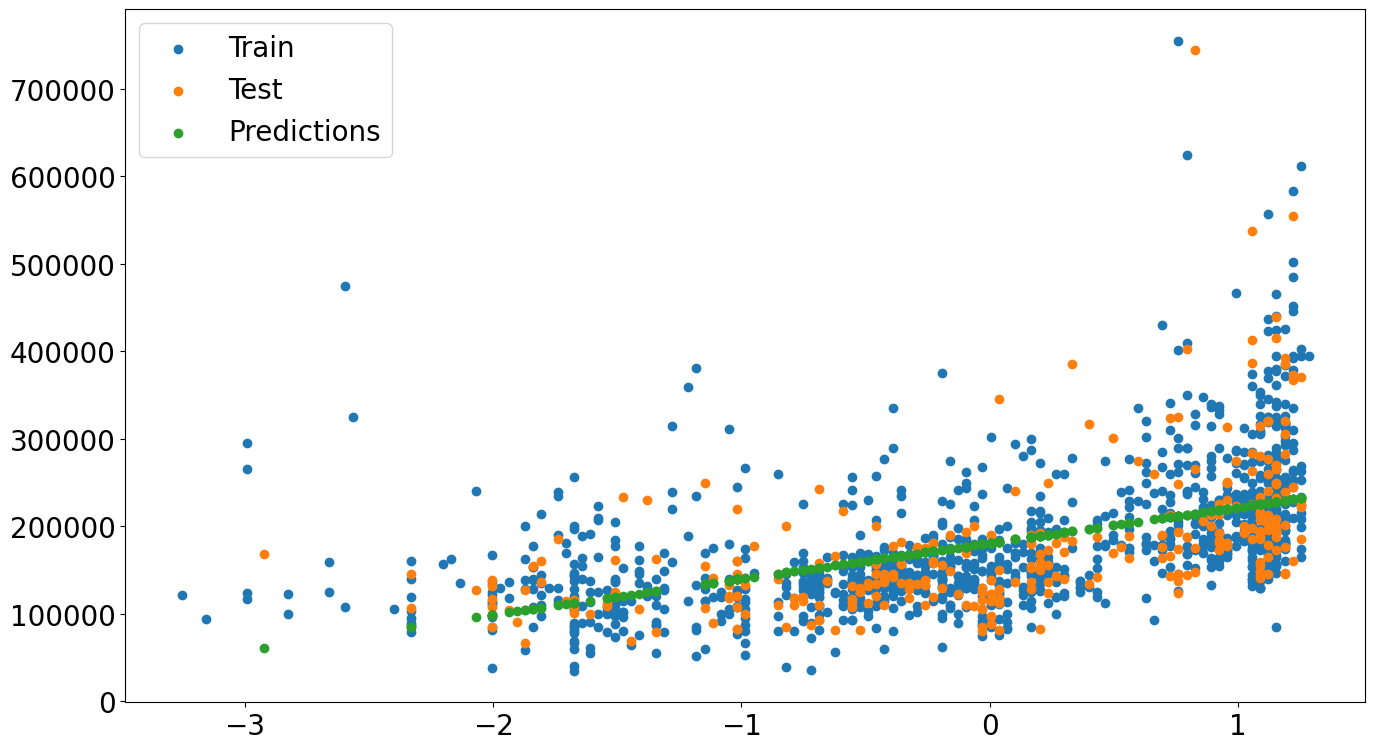

In [238]:
fig = plt.subplots(figsize=(16, 9))
plt.rcParams["font.size"] = 20

plt.scatter(X_train_std, y_train, label="Train")
plt.scatter(X_test_std, y_test, label="Test")
plt.scatter(X_test_std, y_pred_sk, label="Predictions")
plt.legend()
plt.plot()

In [258]:
# Checking the Sklearn model's performance using the MSE and RMSE metrics
mse_sk = mse(y_test, y_pred_sk)
print(f"MSE: {mse_sk}")
print(f"RMSE: {np.sqrt(mse_sk):.1f}")

MSE: 4980069536.617275
RMSE: 70569.6


## Problem Seven: Plotting the learning curve

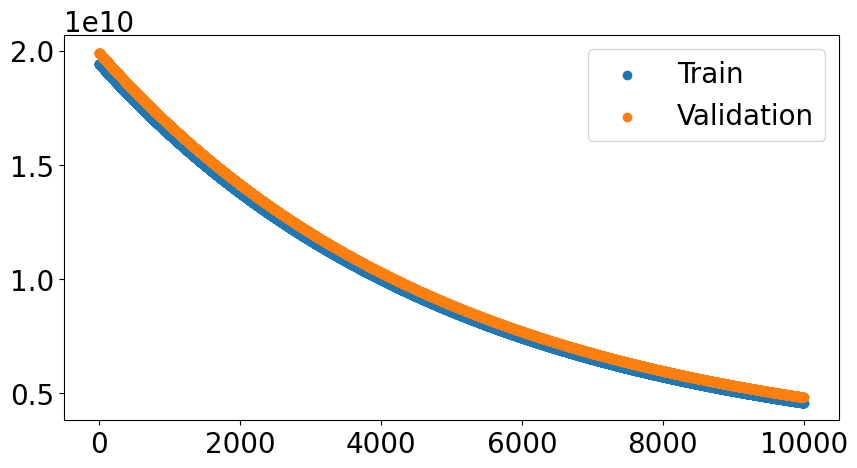

In [265]:
def display_learning_curve(loss, val_loss):
    fig = plt.subplots(figsize=(10, 5))
    plt.rcParams["font.size"] = 20
    
    plt.scatter(range(len(loss)), loss, label="Train")
    plt.scatter(range(len(val_loss)), val_loss, label="Validation")
    plt.legend()
    plt.plot()

display_learning_curve(loss = reg1.loss, val_loss= reg1.val_loss)

## Problem Eight: (Advance task) Removal of bias term

In [269]:
# To remove the bias term, we set the no_bias parameter to True
reg2 = ScratchLinearRegression(10000, 0.001, True, True)
reg2.fit(X_train_std, y_train, X_test_std, y_test)
y_pred2 = reg2.predict(X_test_std)
y_pred2

n_iter:  0 loss:  19424375095.68009 theta:  [ 0.35779328 41.72971912]
n_iter:  1 loss:  19422703195.85427 theta:  [ 0.35779328 82.58791773]
n_iter:  2 loss:  19421034638.156204 theta:  [  0.35779328 123.40525815]
n_iter:  3 loss:  19419369415.90497 theta:  [  0.35779328 164.18178123]
n_iter:  4 loss:  19417707522.433018 theta:  [  0.35779328 204.91752779]
n_iter:  5 loss:  19416048951.086117 theta:  [  0.35779328 245.6125386 ]
n_iter:  6 loss:  19414393695.223343 theta:  [  0.35779328 286.26685439]
n_iter:  7 loss:  19412741748.21703 theta:  [  0.35779328 326.88051588]
n_iter:  8 loss:  19411093103.45279 theta:  [3.57793278e-01 3.67453564e+02]
n_iter:  9 loss:  19409447754.32943 theta:  [3.57793278e-01 4.07986038e+02]
n_iter:  10 loss:  19407805694.25897 theta:  [3.57793278e-01 4.48477981e+02]
n_iter:  11 loss:  19406166916.666588 theta:  [3.57793278e-01 4.88929431e+02]
n_iter:  12 loss:  19404531414.990612 theta:  [3.57793278e-01 5.29340430e+02]
n_iter:  13 loss:  19402899182.68249 th

array([ -18690.61085888,  -40219.83520127,  -28109.64650868,
          8220.91956909,     147.4604407 ,  -81932.70736463,
         48588.21521106,  -45602.14128686,   33786.87347567,
         44551.48564687,   47242.63868966,    6875.3430477 ,
         37823.60303987,   -5234.84564489,  -30800.79955147,
        -18690.61085888,   28404.56739008,   31095.72043288,
         -6580.42216629,  -75204.82475764,  -25418.49346588,
         44551.48564687,  -10617.15173049,   31095.72043288,
          4184.1900049 , -119608.8499638 ,   39169.17956127,
         -1198.1160807 ,   48588.21521106,  -32146.37607287,
        -17345.03433748,   29750.14391148,    9566.49609049,
         39169.17956127,   49933.79173246,   33786.87347567,
         45897.06216826,    1493.0369621 ,   43205.90912547,
         31095.72043288,  -28109.64650868,  -21381.76390168,
         45897.06216826,   44551.48564687,   32441.29695428,
         -9271.57520909,  -21381.76390168,    6875.3430477 ,
          9566.49609049,

[]

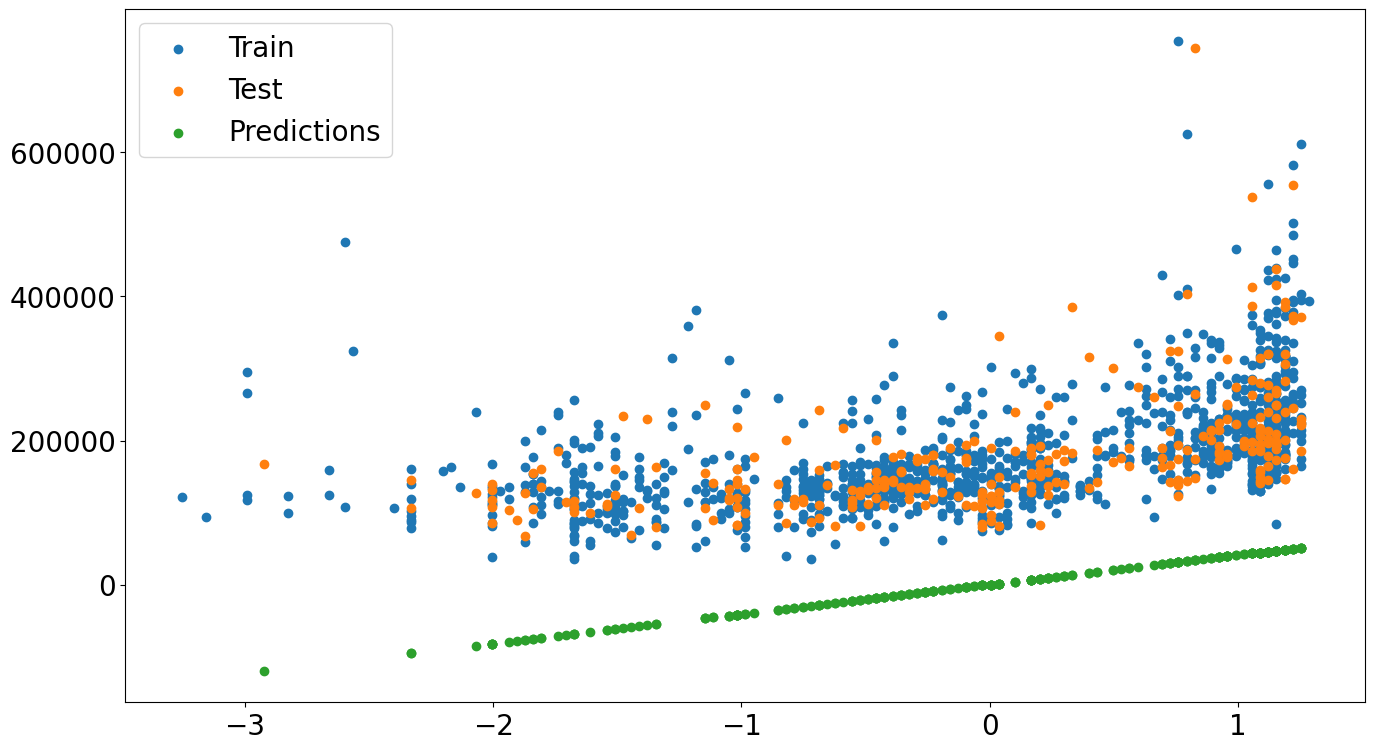

In [270]:
fig = plt.subplots(figsize=(16, 9))
plt.rcParams["font.size"] = 20

plt.scatter(X_train_std, y_train, label="Train")
plt.scatter(X_test_std, y_test, label="Test")
plt.scatter(X_test_std, y_pred2, label="Predictions")
plt.legend()
plt.plot()

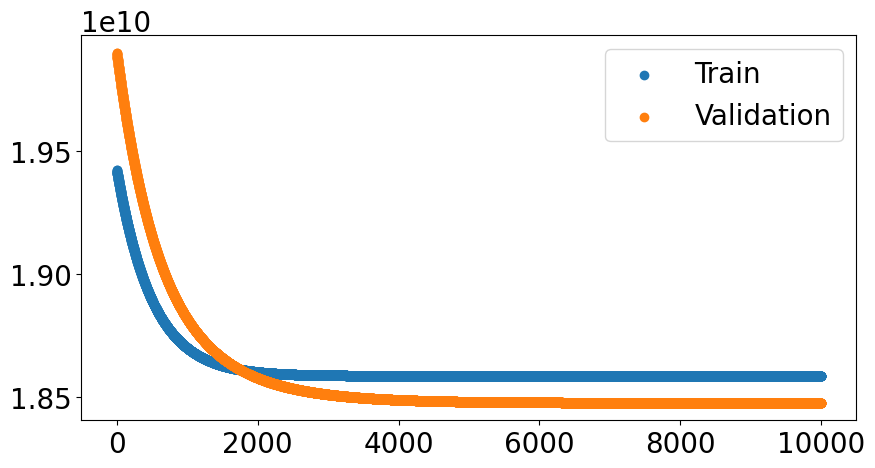

In [271]:
display_learning_curve(loss = reg2.loss, val_loss= reg2.val_loss)

In [302]:
# Checking our model's performance using the MSE and RMSE metrics
mse_2 = mse(y_test, y_pred2)
print(f"MSE: {mse_2}")
print(f"RMSE: {np.sqrt(mse_2):.1f}")

MSE: 36956808562.30375
RMSE: 192241.5


## Problem Nine: (Advance task) Multidimensional feature quantity

In [285]:
df = pd.read_csv("train.csv")
X = df[["YearBuilt", "YearBuilt"]].values
y = df[["SalePrice"]].values.reshape(-1)

# Taking the square of X for input
X[:, 1] = X[:, 1]**2
print(X[0])
print(X.shape)
print(y.shape)

[   2003 4012009]
(1460, 2)
(1460,)


In [286]:
# Splitting the X and y data
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.8, random_state=0)

print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(1168, 2)
(1168,)
(292, 2)
(292,)


In [287]:
scaler = StandardScaler()
scaler.fit(X_train)

X_train_std = scaler.transform(X_train)
X_test_std = scaler.transform(X_test)

In [292]:
reg3 = ScratchLinearRegression(5000, 0.01, False, True)
reg3.fit(X_train_std, y_train, X_test_std, y_test)
y_pred3 = reg3.predict(X_test_std)
y_pred3

n_iter:  0 loss:  19424279534.211926 theta:  [1808.54255519  409.58175051  411.39154153]
n_iter:  1 loss:  19065726689.710163 theta:  [3598.54611936  810.3714482   814.03948414]
n_iter:  2 loss:  18714964445.61371 theta:  [5370.64964789 1203.12691359 1208.65319379]
n_iter:  3 loss:  18371811815.505753 theta:  [7125.03214114 1588.00882846 1595.39335226]
n_iter:  4 loss:  18036092442.33831 theta:  [8861.87080946 1965.17466102 1974.41742775]
n_iter:  5 loss:  17707634465.61007 theta:  [10581.34109109  2334.77873015  2345.87973915]
n_iter:  6 loss:  17386270392.79896 theta:  [12283.6166699   2696.97226843  2709.93151902]
n_iter:  7 loss:  17071836974.900986 theta:  [13968.86949293  3051.90348382  3066.72097535]
n_iter:  8 loss:  16764175085.932364 theta:  [15637.26978773  3399.71762019  3416.39335199]
n_iter:  9 loss:  16463129606.257181 theta:  [17288.98607957  3740.55701658  3759.09098798]
n_iter:  10 loss:  16168549309.60789 theta:  [18924.1852085   4074.56116529  4094.95337564]
n_iter:

array([161866.48519804, 140372.36087521, 152449.52489236, 188885.9224809 ,
       180762.38341012,  99034.64249721, 229731.29065378, 135015.69444777,
       214710.59675042, 225629.67837507, 228363.66494455, 187530.94526161,
       218802.09023718, 175355.1230229 , 149762.75935201, 161866.48519804,
       209261.17473005, 211985.04250757, 174004.36196692, 105674.6113676 ,
       155137.97689804, 225629.67837507, 169954.60849698, 211985.04250757,
       184822.25567202,  62045.60356816, 220166.76463209, 179409.93588882,
       229731.29065378, 148420.00900633, 163213.45170703, 210622.89781065,
       190241.32131652, 220166.76463209, 231099.33797935, 214710.59675042,
       226996.46085164, 182115.25254775, 224263.31751483, 211985.04250757,
       152449.52489236, 159173.81702905, 226996.46085164, 225629.67837507,
       213347.60882083, 171304.10470396, 159173.81702905, 187530.94526161,
       190241.32131652, 147077.68027698, 224263.31751483, 172654.02252727,
       188885.9224809 , 1

[]

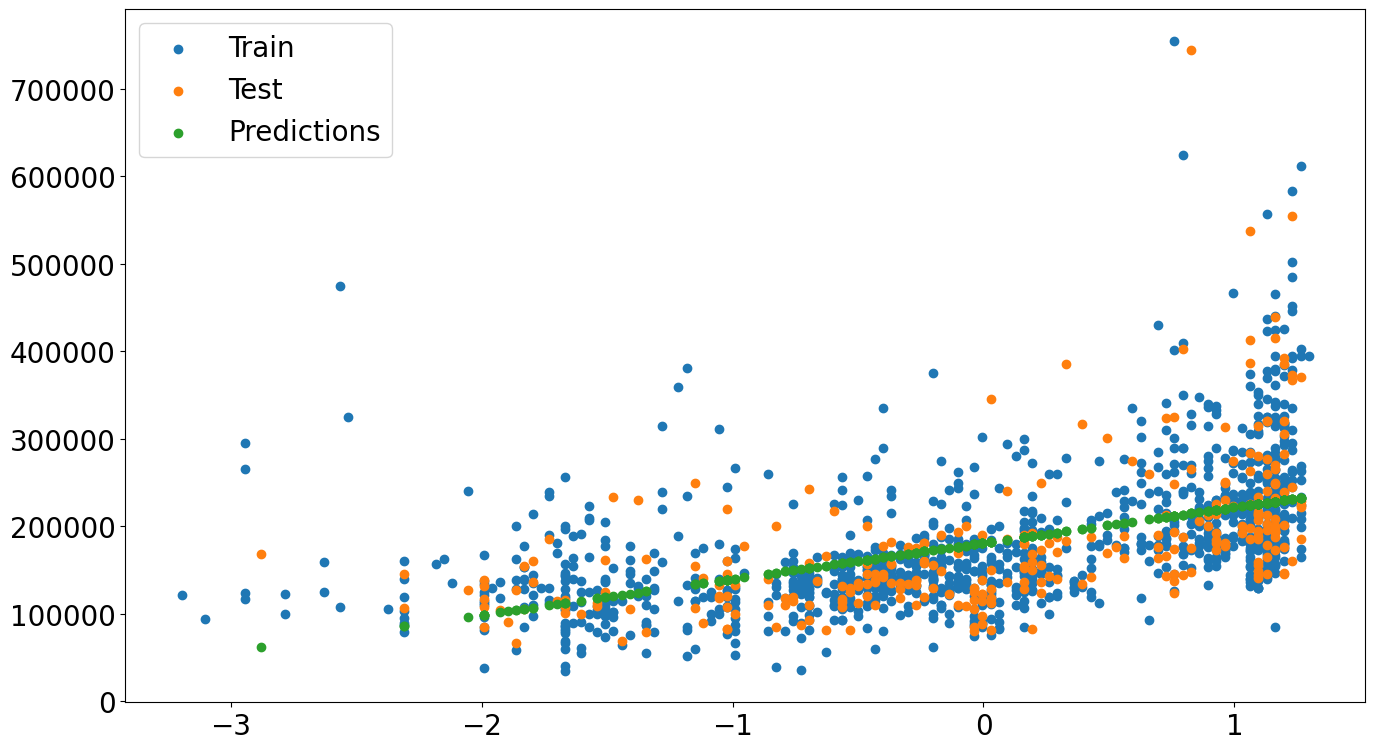

In [293]:
fig = plt.subplots(figsize=(16, 9))
plt.rcParams["font.size"] = 20

plt.scatter(X_train_std[:,1], y_train, label="Train")
plt.scatter(X_test_std[:,1], y_test, label="Test")
plt.scatter(X_test_std[:,1], y_pred3, label="Predictions")
plt.legend()
plt.plot()

In [303]:
# Checking our model's performance using the MSE and RMSE metrics
mse_3 = mse(y_test, y_pred3)
print(f"MSE: {mse_3}")
print(f"RMSE: {np.sqrt(mse_3):.1f}")

MSE: 4971463682.740181
RMSE: 70508.6


In [295]:
# generating a cubic feature and experimenting with it
df = pd.read_csv("train.csv")
X = df[["YearBuilt", "YearBuilt", "YearBuilt"]].values
y = df[["SalePrice"]].values.reshape(-1)

# Taking the square of X for input
X[:, 1] = X[:, 1]**2

# Taking the cube of X for input
X[:, 2] = X[:, 2]**3
print(X[0])
print(X.shape)
print(y.shape)

[      2003    4012009 8036054027]
(1460, 3)
(1460,)


In [296]:
# Splitting the X and y data
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.8, random_state=0)

print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(1168, 3)
(1168,)
(292, 3)
(292,)


In [297]:
scaler = StandardScaler()
scaler.fit(X_train)

X_train_std = scaler.transform(X_train)
X_test_std = scaler.transform(X_test)

In [298]:
reg4 = ScratchLinearRegression(5000, 0.01, False, True)
reg4.fit(X_train_std, y_train, X_test_std, y_test)
y_pred4 = reg4.predict(X_test_std)
y_pred4

n_iter:  0 loss:  19424193840.812145 theta:  [1808.95539308  409.46162489  411.68806065  412.72946786]
n_iter:  1 loss:  19049037409.078167 theta:  [3598.95482887  806.12285026  810.20709     813.06640314]
n_iter:  2 loss:  18683301536.275646 theta:  [5371.05427031 1190.82961495 1196.77123045 1201.44887028]
n_iter:  3 loss:  18326683220.56916 theta:  [7125.43271733 1563.94053589 1571.73911169 1578.23548628]
n_iter:  4 loss:  17978892317.52481 theta:  [8862.26737989 1925.80347199 1935.45860502 1943.77411011]
n_iter:  5 loss:  17639650880.751713 theta:  [10581.73369581  2276.7558469   2288.2671461   2298.40216549]
n_iter:  6 loss:  17308692539.510284 theta:  [12284.00534858  2617.12496205  2630.49204801  2642.44695389]
n_iter:  7 loss:  16985761911.142418 theta:  [13969.25428482  2947.22830026  2962.45080488  2976.22595822]
n_iter:  8 loss:  16670614046.30468 theta:  [15637.6507317   3267.37382035  3284.4513865   3300.04713734]
n_iter:  9 loss:  16363013905.104177 theta:  [17289.36321411

array([161542.52518573, 140118.35921822, 152138.22881344, 188680.8408243 ,
       180497.40283897,  99327.35612419, 230140.8160891 , 134801.8992622 ,
       214833.44609164, 225953.93569855, 228744.17606407, 187314.43168601,
       218996.04805498, 175061.77654517, 149460.21626781, 161542.52518573,
       209297.44066631, 212063.42603407, 173705.36627094, 105842.81395978,
       154820.20732248, 225953.93569855, 169642.12031852, 212063.42603407,
       184584.61794978,  63290.26162682, 220385.60277192, 179136.997705  ,
       230140.8160891 , 148122.69625505, 162889.96986928, 210679.92920921,
       190048.25199669, 220385.60277192, 231538.46986296, 214833.44609164,
       227348.54939738, 181858.80766409, 224560.33457708, 212063.42603407,
       152138.22881344, 158850.618101  , 227348.54939738, 225953.93569855,
       213447.93153139, 170995.53854811, 158850.618101  , 187314.43168601,
       190048.25199669, 146786.16656166, 224560.33457708, 172349.95373542,
       188680.8408243 , 1

[]

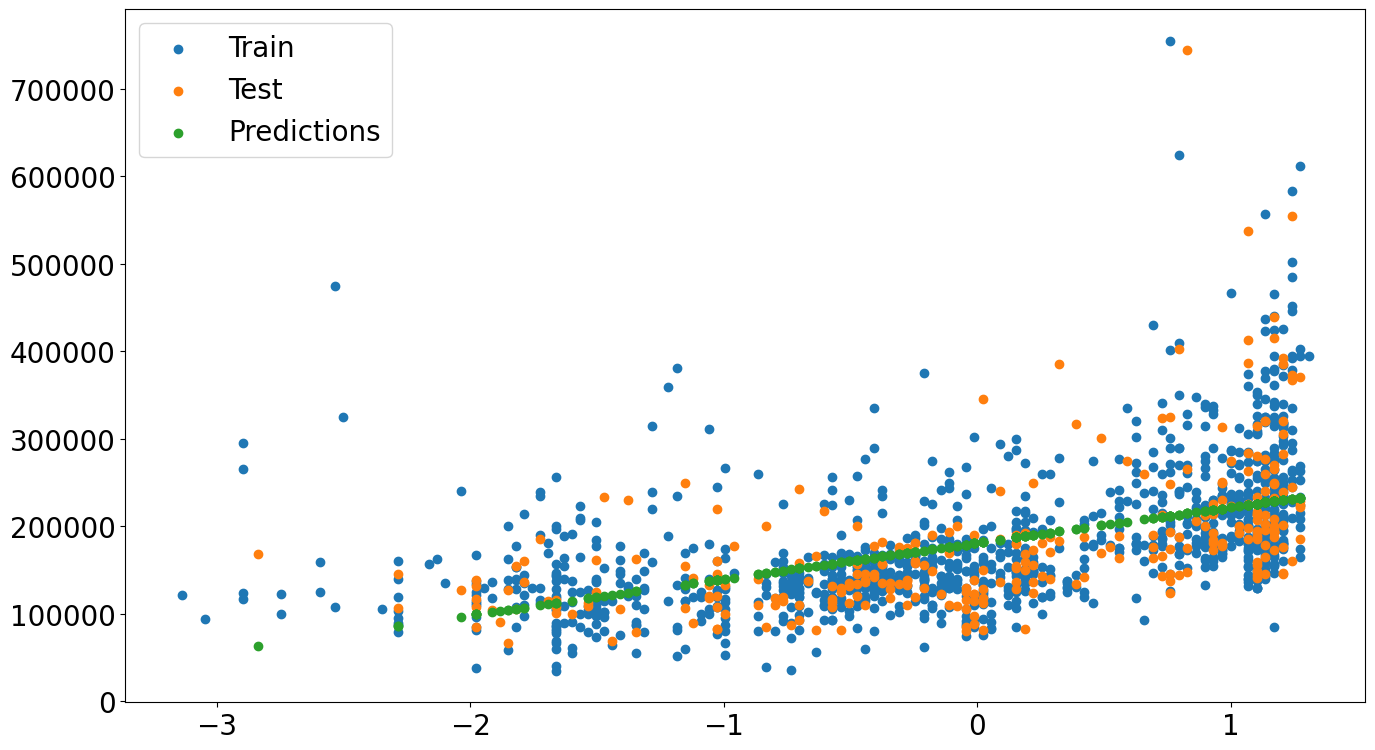

In [299]:
fig = plt.subplots(figsize=(16, 9))
plt.rcParams["font.size"] = 20

plt.scatter(X_train_std[:,2], y_train, label="Train")
plt.scatter(X_test_std[:,2], y_test, label="Test")
plt.scatter(X_test_std[:,2], y_pred4, label="Predictions")
plt.legend()
plt.plot()

In [304]:
# Checking our model's performance using the MSE and RMSE metrics
mse4 = mse(y_test, y_pred4)
print(f"MSE: {mse4}")
print(f"RMSE: {np.sqrt(mse4):.1f}")

MSE: 4960227323.844727
RMSE: 70428.9


## Problem Ten: (Advance task) Derivation of update formula

## Problem Eleven: (Advance task) Problem of local optimum solution

In [ ]:
def coef_determination(y, pred):
    u = ((y - pred) ** 2).sum()
    v = ((y - y.mean() ** 2).sum())
    return 1 - u/v